# NAC3 - Aprendizado de maquina

Nesta nac vamos desenvolver um modelo preditivo do valor do carro.


Dica: Siga todas as instruções, completando e construindo os algoritmos necessários.

Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.


## Informações do grupo

Este projeto poderá ser feito por grupos de `até 2 alunos`.

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Felipe Toscano           | RM 81515       | 4SIA    |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `**dia 16/09/2021**`

Responda o `Google forms` :   [LINK FORMULARIO](https://forms.gle/2iivfbMVToXwe9Wc6).


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 2 ponto)
- R4: Treinamento e Teste do Modelo (Até 1 ponto)
- R5: Validação e Otimização do Modelo (Até 2 ponto)
- R6: Conclusões Finais (Até 2 ponto)

Nota_final = R1 + R2 + R3 + R4 + R5 + R6

## 1. Exploração de Dados

Os dados que serão utilizados extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

Carregue o dataset "Automobile.csv" e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [192]:
dataframe = pd.read_csv('automobile.csv')
dataframe.head(15)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,168,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


**Pergunta:** Apresente uma relação das coluna e seu significado:

Exemplo: 

- make: fabricante
- fuel_type: tipo de combustível
- price: preço (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**

- **symboling**: Fator de risco associado ao preço
- **normalized_losses**: Pagamento de perda média relativa por ano de veículo segurado
- **make**: Fabricante do veículo
- **fuel_type**: Tipo de combustivel para alimentação do veículo
- **aspiration**: Modelo de respiração do motor
- **number_of_doors**: Número de portas do veículo
- **body_style**: Estilo do corpo do veículo
- **drive_wheels**: Estilo do sistema de tração do veículo
- **engine_location**: Localização do motor em relação ao corpo do veículo
- **wheel_base**: Distância entre os eixos do veículo
- **length**: Comprimento do veículo
- **width**: Largura do veículo
- **height**: Altura do veículo
- **curb_weight**: Peso bruto do veículo
- **engine_type**: Estilo do motor
- **number_of_cylinders**: Número de cilindros no motor
- **engine_size**: Tamanho do motor
- **fuel_system**: Modelo do sistema de combustível
- **bore**: Diâmetro de cada cilindro
- **stroke**: Distância percorrida pelo cilindro
- **compression_ratio**: Taxa de compressão (razão entre o volume do cilindro e a câmara de combustão)
- **horsepower**: Potência do motor em cavalos
- **peak_rpm**: RPM máximo do motor
- **city_mpg**: Milhas por galão, dirigindo na cidade
- **highway_mpg**: Milhas por galão, dirigindo na rodovia
- **price**: Preço do veículo

### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos e levante algumas suposições. 

<AxesSubplot:xlabel='engine_size', ylabel='curb_weight'>

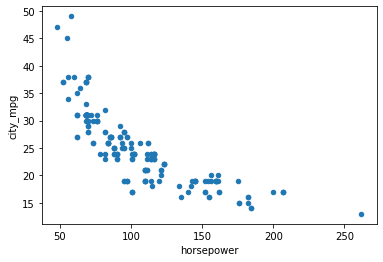

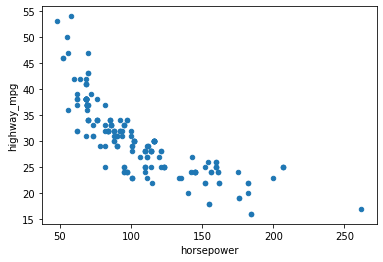

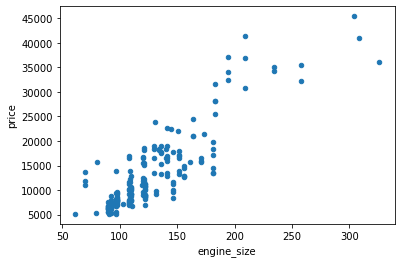

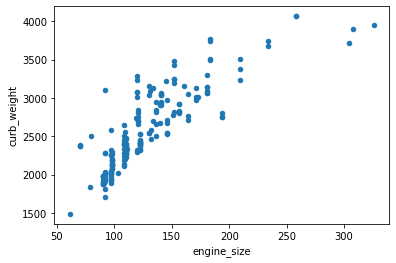

In [193]:
#Quanto maior a potência em cavalos, maior seu gasto de combustível, tanto na cidade quanto na estrada
dataframe.plot.scatter('horsepower', 'city_mpg')
dataframe.plot.scatter('horsepower', 'highway_mpg')

#Quanto maior o motor, maior o preço do veículo
dataframe.plot.scatter('engine_size', 'price')

#Quanto maior o motor, maior a potência em cavalos
dataframe.plot.scatter('engine_size', 'curb_weight')

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**

- **1** - Quanto maior a potência do veículo em cavalos, maior é o seu consumo de combustível
- **2** - Quanto maior o tamanho do motor, maior o preço do veículo
- **3** - O tamanho do motor influencia no peso do veículo

Os pontos nos gráficos apresentam estas tendências pelos eixos x e y. É possível analisar estes padrões com base na incidência destes pontos, que se tornam mais frenquentes em determinados quadrantes do gráfico.

## 2. Preparação dos Dados

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero). **Lembre-se:** Trate esses dados dentro do contexto de análise e justifique suas escolhas.
 

**Resposta:**

In [194]:
dataframe.info()

for column in dataframe:
    print(dataframe[column].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

- Não há nenhum dado nulo, ausente ou fora de contexto.

### __(BONUS: 1 ponto extra.)__ Análise de Outliers

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

dataframeNumbersInput = dataframe[[
    'symboling', 
    'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_size',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg']]

dataframeNumbersOutput = dataframe['price']

isolationForest = IsolationForest(contamination=0.2, random_state=1)

#Estou treinando todos os dados, para que todas as entradas sejam iteradas e o treino separado posteriormente.
predictIsolationForest = isolationForest.fit_predict(dataframeNumbersInput)

#Este caso serve para obter as estatísticas
#inputTrain, inputTest, outputTrain, outputTest = train_test_split(dataframeNumbersInput, dataframeNumbersOutput, test_size=0.2, random_state=1)
#predictIsolationForest = isolationForest.fit_predict(inputTrain)

indexCleanData = predictIsolationForest != -1

"""
#Implementação do teste do MAE e MSE

inputTrain, outputTrain = inputTrain[indexCleanData], outputTrain[indexCleanData]

linearRegression = LinearRegression()
linearRegression.fit(inputTrain, outputTrain)

predictLinearRegression = linearRegression.predict(inputTest)   

print("MAE: ", mean_absolute_error(outputTest, predictLinearRegression))
print("RMSE: ", np.sqrt(mean_squared_error(outputTest, predictLinearRegression)))
print("R2-score: ", r2_score(outputTest, predictLinearRegression))
"""

#Deixando apenas as linhas sem anomalias
cleanDataframe = dataframe[indexCleanData]
cleanDataframe = dataframe.reset_index(drop=True)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**

Sim. Foi utilizado o método IsolationForest, que conforme configurado, identificou as "contaminações" (outliers). Com essa identificação, foram mantidos no dataframe apenas os índices de valor "1", que representam os dados sem anomalias.

Com a remoção dos outliers, o Mean Absolute Error passou de 2582.17 para 2415.90, o Mean Square Error passou de 3416.549 para 3217.116 e o R2 foi de 0.779 para 0.794. Isso deve ainda ser mais otimizado com a normalização dos dados que ainda será feita e posteriormente mudando o algoritmo de regressão, caso seja necessário.

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos não numéricos. Descubra quais são os atributos não numéricos, faça a análise dos valores desses atributos e manipule de forma conveniente para ser interpretado como um dado numérico. 

In [196]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

inputs = cleanDataframe.drop(['price'], axis=1)
outputs = cleanDataframe['price']

#Cria o objeto da classe MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#LabelEncoder
labelEncoderDoors = LabelEncoder()
inputs['number_of_doors'] = labelEncoderDoors.fit_transform(inputs['number_of_doors'])

labelEncoderCylinders = LabelEncoder()
inputs['number_of_cylinders'] = labelEncoderCylinders.fit_transform(inputs['number_of_cylinders'])

#OneHotEncoder
makeOneHotEncoder = OneHotEncoder()
makeOhe = makeOneHotEncoder.fit_transform(inputs[['make']]).toarray()
makeOhe = pd.DataFrame(makeOhe, columns=["make: "+str(int(i)) for i in range(makeOhe.shape[1])])

fuelTypeOneHotEncoder = OneHotEncoder()
fuelTypeOhe = fuelTypeOneHotEncoder.fit_transform(inputs[['fuel_type']]).toarray()
fuelTypeOhe = pd.DataFrame(fuelTypeOhe, columns=["fuel_type: "+str(int(i)) for i in range(fuelTypeOhe.shape[1])])

aspirationOneHotEncoder = OneHotEncoder()
aspirationOhe = aspirationOneHotEncoder.fit_transform(inputs[['aspiration']]).toarray()
aspirationOhe = pd.DataFrame(aspirationOhe, columns=["aspiration: "+str(int(i)) for i in range(aspirationOhe.shape[1])])

bodyStyleOneHotEncoder = OneHotEncoder()
bodyStyleOhe = bodyStyleOneHotEncoder.fit_transform(inputs[['body_style']]).toarray()
bodyStyleOhe = pd.DataFrame(bodyStyleOhe, columns=["body_style: "+str(int(i)) for i in range(bodyStyleOhe.shape[1])])

driveWheelsOneHotEncoder = OneHotEncoder()
driveWheelsOhe = driveWheelsOneHotEncoder.fit_transform(inputs[['drive_wheels']]).toarray()
driveWheelsOhe = pd.DataFrame(driveWheelsOhe, columns=["drive_wheels: "+str(int(i)) for i in range(driveWheelsOhe.shape[1])])

engineLocationOneHotEncoder = OneHotEncoder()
engineLocationOhe = engineLocationOneHotEncoder.fit_transform(inputs[['engine_location']]).toarray()
engineLocationOhe = pd.DataFrame(engineLocationOhe, columns=["engine_location: "+str(int(i)) for i in range(engineLocationOhe.shape[1])])

engineTypeOneHotEncoder = OneHotEncoder()
engineTypeOhe = engineTypeOneHotEncoder.fit_transform(inputs[['engine_type']]).toarray()
engineTypeOhe = pd.DataFrame(engineTypeOhe, columns=["engine_type: "+str(int(i)) for i in range(engineTypeOhe.shape[1])])

fuelSystemOneHotEncoder = OneHotEncoder()
fuelSystemOhe = fuelSystemOneHotEncoder.fit_transform(inputs[['fuel_system']]).toarray()
fuelSystemOhe = pd.DataFrame(fuelSystemOhe, columns=["fuel_system: "+str(int(i)) for i in range(fuelSystemOhe.shape[1])])

inputs = pd.concat([
    inputs, 
    makeOhe,
    fuelTypeOhe,
    aspirationOhe,
    bodyStyleOhe,
    driveWheelsOhe,
    engineLocationOhe,
    engineTypeOhe,
    fuelSystemOhe], axis=1)

inputs = inputs.drop([
    'make',
    'fuel_type',
    'aspiration',
    'body_style',
    'drive_wheels',
    'engine_location',
    'engine_type',
    'fuel_system'
    ], axis=1)

scaled_data = scaler.fit_transform(inputs[inputs.columns])

inputs = pd.DataFrame(scaled_data, columns=inputs.columns)

**Foram criadas várias instâncias do OHE e LabelEncoder para que futuramente possamos usar o método .transform() e facilitar o teste manual do modelo**

**Pergunta:** Quais são os atributos não numéricos? Qual o método de análise adotado? Por que esse essa escolha? 

**Resposta:**

Os atributos não numéricos são:

- number_of_doors
- number_of_cylinders
- make
- fuel_type
- aspiration
- body_style
- drive_wheels
- engine_location
- engine_type
- fuel_system

Foi utilizado o método info(), pois informa o tipo do dado na coluna.

As colunas number_of_doors e number_of_cylinders foram normalizadas com o LabelEncoder, pois dão uma ideia de hierarquia.

Todos os outros dados foram normalizados com o OneHotEncoder, pois neste caso, nenhuma informação é "superior" a outra, apenas diferente. Utilizando o OneHotEncoder, não damos a entender a hierarquia dos números no algoritmo de análise.

Por último, utilizei o MinMaxScaler para manter os valores entre 0 e 1, contribuindo para a eficácia do treinamento.

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para a determinação do preço de carro? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

    É aprendizado supervisionado porque temos os dados de entrada e saída do modelo. O aprendizado não supervisionado não tem dados de saída e o aprendizado por reforço é motivado pela tentativa e erro.

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

    Regressão, pois basicamente precisamos achar números que tentem prever o valor do carro. Em classificação é normalmente utilizado para encontrar tipos de espécies por exemplo, e clusterização agrupa os dados em comum.

**Pergunta:** Escolha 3 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Linear Regression
2. Random Forest Regressor
3. Bayesian Ridge


**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. Linear Regression
- Usará os pontos de dados para encontrar a melhor linha de ajuste para modelar os dados. 
- Uma linha pode ser representada pela equação, y = m * x + c onde y é a variável dependente e x é a variável independente. As teorias básicas de cálculo são aplicadas para encontrar os valores para m e c usando o conjunto de dados fornecido.

2. Random Forest Regressor
- Pode ser identificada como uma coleção de árvores de decisão como o próprio nome diz. Cada árvore tenta estimar uma classificação e isso é chamado como “voto”. 
- Idealmente, consideramos cada voto de cada árvore e escolhemos a classificação mais votada.

3. Bayesian Ridge
- É um modelo probabilístico
- No ponto de vista bayesiano, formulamos regressão linear usando distribuições de probabilidade em vez de estimativas pontuais.

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo.

In [197]:
#Variáveis já definidas anteriormente no passo do tratamento dos dados paramétricos
#inputs = cleanDataframe.drop(['price'], axis=1)
#outputs = cleanDataframe['price']

Divida o subset em conjunto de treinamento e teste.

In [198]:
inputTrain, inputTest, outputTrain, outputTest = train_test_split(inputs, outputs, test_size=0.2, random_state=1)

## 4. Treinamento e teste do modelo

Faça o treinamento e teste de dos 3 algoritmos escolhidos. Para cada um dos modelos utilize uma das métricas: R2-score, RMSE e MAE para avaliar a performance dos medelos. Utilize a média do obtido da validação cruzada para um kfold de 5.

In [199]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=7)

### Algoritmo 1

In [200]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(inputTrain, outputTrain)

#Predict com base nos 80% de treino e 20% de teste
predict = linearRegression.predict(inputTest)
print('MAE: ', mean_absolute_error(outputTest, predict))
print('RMSE: ', np.sqrt(mean_squared_error(outputTest, predict)))
print("R2-score: ", r2_score(outputTest, predict))

#Predict com base no modelo de validação cruzada, com dados de treino e testes variados
scores = cross_val_score(linearRegression, inputs, outputs, cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())


MAE:  245836390037185.3
RMSE:  1574120947479897.5
R2-score:  -4.675571870303911e+22
R2-score médio com KFold:  -1.5970932706107117e+23


### Algoritmo 2

In [201]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(inputTrain, outputTrain)

#Predict com base nos 80% de treino e 20% de teste
predict = randomForestRegressor.predict(inputTest)
print('MAE: ', mean_absolute_error(outputTest, predict))
print('RMSE: ', np.sqrt(mean_squared_error(outputTest, predict)))
print("R2-score: ", r2_score(outputTest, predict))

#Predict com base no modelo de validação cruzada, com dados de treino e testes variados
scores = cross_val_score(randomForestRegressor, inputs, outputs, cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())


MAE:  1140.2084634146345
RMSE:  1577.777636298307
R2-score:  0.953026801569855
R2-score médio com KFold:  0.9178871091437818


### Algoritmo 3

In [202]:
from sklearn.linear_model import BayesianRidge

bayesianRidge = BayesianRidge()
bayesianRidge.fit(inputTrain, outputTrain)

#Predict com base nos 80% de treino e 20% de teste
predict = bayesianRidge.predict(inputTest)
print('MAE: ', mean_absolute_error(outputTest, predict))
print('RMSE: ', np.sqrt(mean_squared_error(outputTest, predict)))
print("R2-score: ", r2_score(outputTest, predict))

#Predict com base no modelo de validação cruzada, com dados de treino e testes variados
scores = cross_val_score(bayesianRidge, inputs, outputs, cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())

MAE:  1618.8525227992504
RMSE:  2056.5726330570315
R2-score:  0.9201919599916798
R2-score médio com KFold:  0.9160520044218851


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

**Linear Regression**
- MAE:  245836390037185.3
- RMSE:  1574120947479897.5
- R2-score:  -4.675571870303911e+22
- R2-score médio com KFold:  -1.5970932706107117e+23

**Random Forest Regressor**
- MAE:  1141.1513292682928
- RMSE:  1563.5207284176715
- R2-score:  0.9538718723242813
- R2-score médio com KFold:  0.9241342500601878

**Bayesian Ridge**
- MAE:  1618.8525227992504
- RMSE:  2056.5726330570315
- R2-score:  0.9201919599916798
- R2-score médio com KFold:  0.9160520044218851

(Valores do KFold podem variar por tratar dados randomicamente)

A regressão linear foi a que teve a pior e mais distante pontuação sobre os outros modelos. Essa grande taxa de erro se da pelo dataframe ter muitas variáveis e pelo algoritmo tentar achar uma forma de relacionar todas elas. Neste caso, nem todas as variáveis tem uma relação, e, por isto, acaba piorando o modelo de aprendizagem.

O Random forest foi o que mais se saiu bem neste treinamento. Essa boa pontuação se da pelo seu modelo de decisão, onde se baseia nos vários dados e pega as informações mais relevantes para criar suas regras e refinar o modelo de aprendizagem. 

O Bayesian Ridge aplica um modelo probabilístico, onde realiza estimativas com base em dados, e quanto mais variáveis ele recebe, melhor fica a sua probabilidade. Este método se assemelhou bastante ao Random Forest em questão dos resultados.

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize técinicas como **RandomSearchCV** ou **GridSearchCV**.

**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta:**

A RandomSearchCV, pois randomiza as iterações e possui um limite personalizável. Como o dataframe tem um grande número de variáveis, se tornaria inviável usar o GridSearchCV dependendo do computador e dos parâmetros a serem utilizados, justamente pelo GridCV utilizar todas as possibilidades possíveis. Com o RandomSearchCV, também podemos explorar uma gama maior de parâmetros.

In [203]:
from sklearn.model_selection import RandomizedSearchCV

### Algoritmo 1

In [204]:
#linearRegression.get_params()

param_grid = {
    'copy_X': ('True', 'False'),
    'fit_intercept' : ('True', 'False'), 
    'n_jobs': [1, 10, 20, 30, 40, 50, 100, 500, 1000, 2000],
    'normalize': ('True', 'False'),
    'positive': ('True', 'False') 
}

cv = RandomizedSearchCV(linearRegression, param_grid, cv=5, n_jobs=-1, verbose=2)  
cv.fit(inputs, outputs)

print("Os melhores parâmetros são: ", cv.best_params_)
print("Os melhor score foi: ", cv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Os melhores parâmetros são:  {'positive': 'True', 'normalize': 'True', 'n_jobs': 30, 'fit_intercept': 'False', 'copy_X': 'False'}
Os melhor score foi:  -4.239874560481303e+24


### Algoritmo 2

In [205]:
#randomForestRegressor.get_params()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

cv = RandomizedSearchCV(randomForestRegressor, param_grid, cv=5, n_jobs=-1, verbose=2)  
cv.fit(inputs, outputs)

print("Os melhores parâmetros são: ", cv.best_params_)
print("Os melhor score foi: ", cv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Os melhores parâmetros são:  {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Os melhor score foi:  0.6040779332694128


### Algoritmo 3

In [206]:
#bayesianRidge.get_params()

param_grid = {
    'compute_score': [False, True],
    'copy_X': [False, True],
    'fit_intercept': [False, True],
    'n_iter': [100, 200, 300, 400, 500, 1000],
    'normalize': [False, True],
    'tol': [0.001, 0.002, 0.003, 0.004, 0.005, 0.010],
 }

cv = RandomizedSearchCV(bayesianRidge, param_grid, cv=5, n_jobs=-1, verbose=2)  
cv.fit(inputs, outputs)

print("Os melhores parâmetros são: ", cv.best_params_)
print("Os melhor score foi: ", cv.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Os melhores parâmetros são:  {'tol': 0.004, 'normalize': True, 'n_iter': 300, 'fit_intercept': False, 'copy_X': True, 'compute_score': True}
Os melhor score foi:  0.295403653400122


Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

**Resposta:**

|                     | Linear Regression | Random Forest Regression | Bayesian Ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      {'positive': 'True', 'normalize': 'False', 'n_jobs': 500, 'fit_intercept': 'True', 'copy_X': 'True'}           |      {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}                       |   {'tol': 0.01, 'normalize': False, 'n_iter': 500, 'fit_intercept': False, 'copy_X': False, 'compute_score': False}              |
| teste  |      -4.239874560481303e+24           |      0.6227146507253994                       |   0.29540365503378857              |


**Valores podem mudar pelo RandomSearchCV utilizar iterações aleatórias**

**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

O algoritmo Random Forest Regressor foi o que teve o melhor score. Esse tipo de regressão aceita uma maior quantidade de parâmetros no geral e consequentemente pode ser melhor testado pelo otimizador.

### __(BONUS: 1 ponto extra.)__ Implementação do algoritmo otimizado

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente.

In [207]:
randomForest = RandomForestRegressor(
    n_estimators=400, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    max_features='sqrt',
    max_depth=40,
    bootstrap=True)

randomForest.fit(inputs, outputs)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=400)

### Modelo de produção: Teste com novos dados

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Defina o teste para um resultado baixo, médio e alto do preço do carro.

In [212]:
cleanDataframeInputs = cleanDataframe.drop(['price'], axis=1)

teste1 = pd.DataFrame([[-1, 50 , 'chevrolet', 'gas', 'std'  , 'two' , 'hatchback', 'fwd', 'front', 93.7 , 150  , 64  , 52.6, 1837, 'ohc' , 'four'  , 79,  '1bbl', 2.91, 3.07, 10.1, 80 , 5500, 38, 42]], columns=cleanDataframeInputs.columns)
teste2 = pd.DataFrame([[1 , 100, 'bmw'      , 'gas', 'std'  , 'two' , 'sedan'    , 'rwd', 'front', 101.2, 176.8, 64.8, 54.3, 2710, 'ohc' , 'six'   , 164, 'mpfi', 3.31, 3.19, 9   , 120, 4250, 21, 28]], columns=cleanDataframeInputs.columns)
teste3 = pd.DataFrame([[3 , 150, 'jaguar'   , 'gas', 'turbo', 'four', 'sedan'    , '4wd', 'rear' , 102  , 191.7, 70.6, 47.8, 3950, 'ohcv', 'twelve', 326, 'mpfi', 3.54, 2.76, 11.5, 200, 5000, 13, 17]], columns=cleanDataframeInputs.columns)

def transform(dataframe):
    #LabelEncoder
    dataframe['number_of_doors'] = labelEncoderDoors.transform(dataframe['number_of_doors'])
    dataframe['number_of_cylinders'] = labelEncoderCylinders.transform(dataframe['number_of_cylinders'])

    #OneHotEncoder
    makeOhe = makeOneHotEncoder.transform(dataframe[['make']]).toarray()
    makeOhe = pd.DataFrame(makeOhe, columns=["make: "+str(int(i)) for i in range(makeOhe.shape[1])])

    fuelTypeOhe = fuelTypeOneHotEncoder.transform(dataframe[['fuel_type']]).toarray()
    fuelTypeOhe = pd.DataFrame(fuelTypeOhe, columns=["fuel_type: "+str(int(i)) for i in range(fuelTypeOhe.shape[1])])

    aspirationOhe = aspirationOneHotEncoder.transform(dataframe[['aspiration']]).toarray()
    aspirationOhe = pd.DataFrame(aspirationOhe, columns=["aspiration: "+str(int(i)) for i in range(aspirationOhe.shape[1])])

    bodyStyleOhe = bodyStyleOneHotEncoder.transform(dataframe[['body_style']]).toarray()
    bodyStyleOhe = pd.DataFrame(bodyStyleOhe, columns=["body_style: "+str(int(i)) for i in range(bodyStyleOhe.shape[1])])

    driveWheelsOhe = driveWheelsOneHotEncoder.transform(dataframe[['drive_wheels']]).toarray()
    driveWheelsOhe = pd.DataFrame(driveWheelsOhe, columns=["drive_wheels: "+str(int(i)) for i in range(driveWheelsOhe.shape[1])])

    engineLocationOhe = engineLocationOneHotEncoder.transform(dataframe[['engine_location']]).toarray()
    engineLocationOhe = pd.DataFrame(engineLocationOhe, columns=["engine_location: "+str(int(i)) for i in range(engineLocationOhe.shape[1])])

    engineTypeOhe = engineTypeOneHotEncoder.transform(dataframe[['engine_type']]).toarray()
    engineTypeOhe = pd.DataFrame(engineTypeOhe, columns=["engine_type: "+str(int(i)) for i in range(engineTypeOhe.shape[1])])

    fuelSystemOhe = fuelSystemOneHotEncoder.transform(dataframe[['fuel_system']]).toarray()
    fuelSystemOhe = pd.DataFrame(fuelSystemOhe, columns=["fuel_system: "+str(int(i)) for i in range(fuelSystemOhe.shape[1])])

    dataframe = pd.concat([
        dataframe, 
        makeOhe,
        fuelTypeOhe,
        aspirationOhe,
        bodyStyleOhe,
        driveWheelsOhe,
        engineLocationOhe,
        engineTypeOhe,
        fuelSystemOhe], axis=1)

    dataframe = dataframe.drop([
        'make',
        'fuel_type',
        'aspiration',
        'body_style',
        'drive_wheels',
        'engine_location',
        'engine_type',
        'fuel_system'
        ], axis=1)

    scaled_data = scaler.transform(dataframe[dataframe.columns])

    return pd.DataFrame(scaled_data, columns=dataframe.columns)

teste1 = transform(teste1)
teste2 = transform(teste2)
teste3 = transform(teste3)

predictTeste1 = randomForest.predict(teste1)
predictTeste2 = randomForest.predict(teste2)
predictTeste3 = randomForest.predict(teste3)

print("O valor do veículo do primeiro teste (barato) é: ", predictTeste1[0])
print("O valor do veículo do segundo teste (médio) é: ", predictTeste2[0])
print("O valor do veículo do terceiro teste (caro) é: ", predictTeste3[0])


O valor do veículo do primeiro teste (barato) é:  6295.122250676674
O valor do veículo do segundo teste (médio) é:  19281.386209776338
O valor do veículo do terceiro teste (caro) é:  32185.010984670138


**Pergunta:** Qual foi o resultado obtido? O resultado está coerente com o esperado?

**Resposta:**

- O valor do veículo do primeiro teste (barato) é:  6295.122250676674
- O valor do veículo do segundo teste (médio) é:  19281.386209776338
- O valor do veículo do terceiro teste (caro) é:  32185.010984670138

Sim! Os valores estão bem coerentes :)

## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim! Com base nos valores inseridos nos testes, os preços vieram bem coerentes com o esperado.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Poderia normalizar ainda mais os dados, fazendo estudos para otimizar ainda mais o entendimento do modelo, e também poderia fazer mais testes com mais parâmetros na otimização do algoritmo, talvez utilizando um GridSearchCV para passar por ainda mais casos e retornar parametros ainda mais eficientes.

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**: Não, pois se trata de um valor de um veículo, que é totalmente variável. Seria mais plausível utilizar um modelo de classificação se fosse para encontrar o estilo do veículo, ou a sua CATEGORIA de preço, como >= 50000 etc.